### Importing libraries required for modelling:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, confusion_matrix

### Loading data files, Merging Data & Data Cleaning:

In [2]:
# customer dataset

df1 = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/customers_final.csv')

In [3]:
df1

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort
...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland


In [4]:
# engagement dataset

df2 = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/engagements_final.csv')

In [5]:
df2

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7
...,...,...,...,...
9995,9996,119,47,16
9996,9997,3,33,14
9997,9998,53,17,5
9998,9999,23,5,4


In [6]:
# marketing dataset 

df3 = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/marketing_final.csv')

In [7]:
df3

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08
...,...,...,...,...,...
25195,25196,9998,Yes,Discount,2023-09-20
25196,25197,9999,No,Buy One Get One,2022-06-02
25197,25198,9999,No,Discount,2022-05-14
25198,25199,10000,No,Free Shipping,2023-06-12


In [8]:
# transaction dataset 

df4 = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/transactions_final.csv')

In [9]:
df4

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics
...,...,...,...,...,...
129540,129541,10000,2023-05-27,371.70,Home Goods
129541,129542,10000,2023-06-11,1245.23,Electronics
129542,129543,10000,2023-06-28,745.74,Electronics
129543,129544,10000,2023-07-21,587.37,Home Goods


In [10]:
# Check size of each dataset 

print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)


(10000, 6)
(10000, 4)
(25200, 5)
(129545, 5)


In [11]:
df1.info()

# Noticed that there are some null values under Age and Gender
# However, they should be kept because although these fields are null, the customers could still be contributive 
# for building prediction models regarding their LTV and transactions, therefore, I would keep them for now 
# and replace 'Unknown' for Gender only as it is a categorical field; replacing to 'Unknown' for Age might 
# cause errors in calculations (e.g., mean, median)  

# Also noticed that dates are object type -- should be converted to datetime 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [12]:
# Data type issue: converting data type from object to datetime

df1['join_date'] = pd.to_datetime(df1['join_date'])
df1['last_purchase_date'] = pd.to_datetime(df1['last_purchase_date'])
df1['gender'] = df1['gender'].fillna('Unknown')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         10000 non-null  int64         
 1   join_date           10000 non-null  datetime64[ns]
 2   last_purchase_date  10000 non-null  datetime64[ns]
 3   age                 8991 non-null   float64       
 4   gender              10000 non-null  object        
 5   location            10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 468.9+ KB


In [13]:
df1

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort
...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland


In [14]:
df1.describe()

,customer_id,age
count,10000.00000,8991.000000
mean,5000.50000,43.467467
std,2886.89568,15.094380
min,1.00000,18.000000
25%,2500.75000,30.000000
50%,5000.50000,44.000000
75%,7500.25000,57.000000
max,10000.00000,69.000000


In [15]:
df2.info()

# No null values 
# Data types are appropriate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [16]:
df2.describe()

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,100.111900,39.862100,19.725300
std,2886.89568,118.625052,46.511719,22.975083
min,1.00000,1.000000,1.000000,1.000000
25%,2500.75000,15.000000,6.000000,3.000000
50%,5000.50000,53.000000,22.000000,11.000000
75%,7500.25000,141.000000,57.000000,28.000000
max,10000.00000,711.000000,303.000000,142.000000


In [17]:
df3.info()

# No null values 
# campaign_date should be converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [18]:
# Data type issue: converting data type from object to datetime

df3['campaign_date'] = pd.to_datetime(df3['campaign_date'])

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   campaign_id     25200 non-null  int64         
 1   customer_id     25200 non-null  int64         
 2   response        25200 non-null  object        
 3   promotion_type  25200 non-null  object        
 4   campaign_date   25200 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 984.5+ KB


In [19]:
df3.describe()

,campaign_id,customer_id
count,25200.000000,25200.000000
mean,12600.500000,4998.330357
std,7274.757728,2882.991935
min,1.000000,1.000000
25%,6300.750000,2511.000000
50%,12600.500000,5001.000000
75%,18900.250000,7486.000000
max,25200.000000,10000.000000


In [20]:
df4.info()

# No null values 
# transaction_date should be converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [21]:
# Data type issue: converting data type from object to datetime

df4['transaction_date'] = pd.to_datetime(df4['transaction_date'])

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   transaction_id      129545 non-null  int64         
 1   customer_id         129545 non-null  int64         
 2   transaction_date    129545 non-null  datetime64[ns]
 3   transaction_amount  129545 non-null  float64       
 4   product_category    129545 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.9+ MB


In [22]:
df4.describe()

,transaction_id,customer_id,transaction_amount
count,129545.000000,129545.000000,129545.000000
mean,64773.000000,4998.806237,597.287659
std,37396.564648,2882.049926,491.564174
min,1.000000,1.000000,10.020000
25%,32387.000000,2494.000000,228.320000
50%,64773.000000,5006.000000,438.380000
75%,97159.000000,7476.000000,846.980000
max,129545.000000,10000.000000,1999.990000


In [23]:
# merging consumer data - df1 and engagement data - df2 together -- inner join - based on the same customer_id 

merged_customer = pd.merge(df1, df2, on = ['customer_id','customer_id'])

merged_customer

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7
...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4


In [24]:
# aggregate df3 - marketing data to get the total number of campaigns that each customer responded 

marketing_agg = df3[df3['response']=='Yes'].groupby('customer_id')['campaign_id'].count().to_frame()

marketing_agg

,campaign_id
customer_id,
1,1
2,2
3,1
4,1
6,1
...,...
9993,2
9994,2
9997,1


In [25]:
# aggregate df4 - transaction data to get the total number of transactions each customer has completed and the sum of the amount of all their transactions 

transactions_agg = df4.groupby('customer_id').aggregate({'transaction_id':'count','transaction_amount':'sum'})

transactions_agg

,transaction_id,transaction_amount
customer_id,,
1,6,3509.48
2,9,6081.32
3,6,1454.87
4,20,7874.68
5,24,15524.55
...,...,...
9996,10,5498.20
9997,12,5848.30
9998,3,3503.13


In [26]:
join_data1 = pd.merge(merged_customer, marketing_agg, on = ['customer_id','customer_id'], how = 'outer')

join_data1

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1.0
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2.0
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1.0
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1.0
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,NaN
...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,NaN
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1.0
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1.0
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,NaN


In [27]:
# final_data -- merged 4 datasets at per customer level 

final_data = pd.merge(join_data1, transactions_agg, on = ['customer_id','customer_id'], how = 'outer')

final_data

# transaction_id -- this is the frequency measure for each user throughout their entire lifespan 
# transaction_amount -- this is the monetary measure -- LTV lifetime value for each user throughout their entire lifespan 


,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_id,transaction_id,transaction_amount
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1.0,6,3509.48
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2.0,9,6081.32
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1.0,6,1454.87
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1.0,20,7874.68
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,NaN,24,15524.55
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,NaN,10,5498.20
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1.0,12,5848.30
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1.0,3,3503.13
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,NaN,12,6721.86


#### Data Investigation and Preparation:

In [28]:
# the total count of each customer’s transactions completed is the frequency throughout each customer's lifespan 
# the sum of the amount of transactions for each customer is the monetary value -- LTV throughout each customer's lifespan 

final_data.rename({'transaction_id': 'frequency_lifespan', 'transaction_amount': 'LTV_lifespan', 'campaign_id': 'campaign_respond'}, axis = 1, inplace = True)

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1.0,6,3509.48
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2.0,9,6081.32
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1.0,6,1454.87
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1.0,20,7874.68
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,NaN,24,15524.55
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,NaN,10,5498.20
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1.0,12,5848.30
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1.0,3,3503.13
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,NaN,12,6721.86


In [29]:
final_data.info()

# Notice that there are NULL values under campaign_respond -- required investigation 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              10000 non-null  int64         
 1   join_date                10000 non-null  datetime64[ns]
 2   last_purchase_date       10000 non-null  datetime64[ns]
 3   age                      8991 non-null   float64       
 4   gender                   10000 non-null  object        
 5   location                 10000 non-null  object        
 6   number_of_site_visits    10000 non-null  int64         
 7   number_of_emails_opened  10000 non-null  int64         
 8   number_of_clicks         10000 non-null  int64         
 9   campaign_respond         7665 non-null   float64       
 10  frequency_lifespan       10000 non-null  int64         
 11  LTV_lifespan             10000 non-null  float64       
dtypes: datetime64[ns](2), float64(3),

In [30]:
# All rows with campaign_respond populated as NULL 

final_data[final_data['campaign_respond'].isnull()]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,NaN,24,15524.55
25,26,2023-05-26,2023-11-18,65.0,Female,Wrighthaven,85,18,6,NaN,16,11494.40
27,28,2022-04-11,2023-05-03,64.0,Male,Maryland,133,55,21,NaN,1,757.81
28,29,2020-02-19,2021-09-14,20.0,Male,North Cameron,51,23,23,NaN,9,3741.73
29,30,2020-08-04,2023-05-21,47.0,Male,Port Tracyton,279,142,18,NaN,24,16134.70
...,...,...,...,...,...,...,...,...,...,...,...,...
9984,9985,2022-12-31,2024-03-11,40.0,Female,Port Johnny,89,71,11,NaN,3,2580.73
9988,9989,2020-04-16,2022-07-06,62.0,Female,Lake Sarahmouth,91,101,31,NaN,4,1781.32
9994,9995,2020-08-06,2022-04-10,NaN,Male,Port Jermaine,66,115,19,NaN,16,9005.05
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,NaN,10,5498.20


In [31]:
df3[df3['customer_id'] == 5] 

# customer_id 5 -- didn't respond to any campaign -- therefore - a NULL value

,campaign_id,customer_id,response,promotion_type,campaign_date
14,15,5,No,Discount,2023-02-28
15,16,5,No,Discount,2022-02-06
16,17,5,No,Free Shipping,2022-11-26
17,18,5,No,Buy One Get One,2022-09-29


In [32]:
# replacing the null values under campaign_respond to 0 as they are the ones who didn't respond to any campaigns

final_data['campaign_respond'] = final_data['campaign_respond'].fillna(0)


final_data['campaign_respond'] = final_data['campaign_respond'].astype(int)

In [33]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   customer_id              10000 non-null  int64         
 1   join_date                10000 non-null  datetime64[ns]
 2   last_purchase_date       10000 non-null  datetime64[ns]
 3   age                      8991 non-null   float64       
 4   gender                   10000 non-null  object        
 5   location                 10000 non-null  object        
 6   number_of_site_visits    10000 non-null  int64         
 7   number_of_emails_opened  10000 non-null  int64         
 8   number_of_clicks         10000 non-null  int64         
 9   campaign_respond         10000 non-null  int32         
 10  frequency_lifespan       10000 non-null  int64         
 11  LTV_lifespan             10000 non-null  float64       
dtypes: datetime64[ns](2), float64(2),

In [34]:
final_data.describe()

# columns of number_of_site_visits, number_of_emails_opened and number_of_clicks have MAX values that are way above their 75th percentile value - require investigation

,customer_id,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan
count,10000.00000,8991.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,43.467467,100.111900,39.862100,19.725300,1.257800,12.954500,7737.562981
std,2886.89568,15.094380,118.625052,46.511719,22.975083,0.971511,7.191203,4628.799469
min,1.00000,18.000000,1.000000,1.000000,1.000000,0.000000,1.000000,23.810000
25%,2500.75000,30.000000,15.000000,6.000000,3.000000,1.000000,7.000000,3839.915000
50%,5000.50000,44.000000,53.000000,22.000000,11.000000,1.000000,13.000000,7498.890000
75%,7500.25000,57.000000,141.000000,57.000000,28.000000,2.000000,19.000000,11275.797500
max,10000.00000,69.000000,711.000000,303.000000,142.000000,4.000000,25.000000,24298.220000


AxesSubplot(0.125,0.125;0.775x0.755)


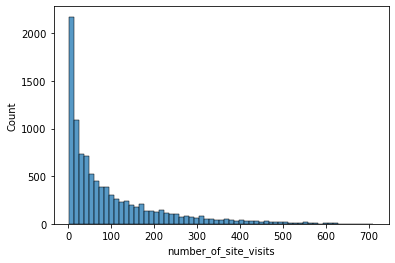

In [35]:
print(sns.histplot(final_data['number_of_site_visits']))


AxesSubplot(0.125,0.125;0.775x0.755)


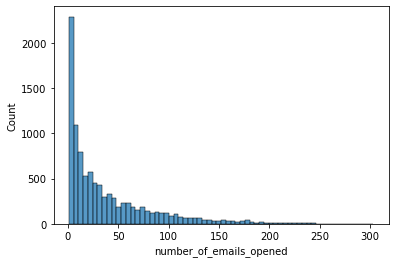

In [36]:
print(sns.histplot(final_data['number_of_emails_opened']))


AxesSubplot(0.125,0.125;0.775x0.755)


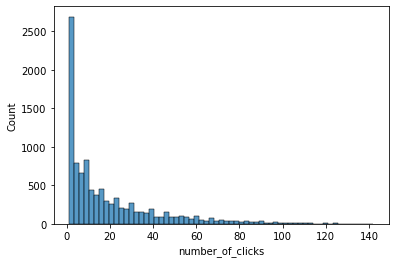

In [37]:
print(sns.histplot(final_data['number_of_clicks']))

c:\Users\kryst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_site_visits'>

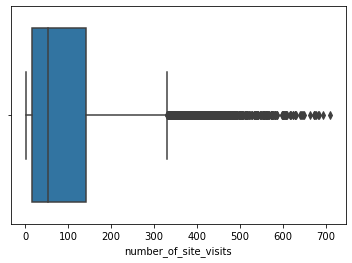

In [38]:
sns.boxplot(final_data['number_of_site_visits'])

# noted that there are quite a few data points that are beyond the 99th percentile range 

c:\Users\kryst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_emails_opened'>

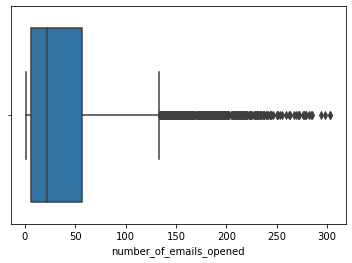

In [39]:
sns.boxplot(final_data['number_of_emails_opened'])

# noted that there are quite a few data points that are beyond the 99th percentile range 

c:\Users\kryst\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_clicks'>

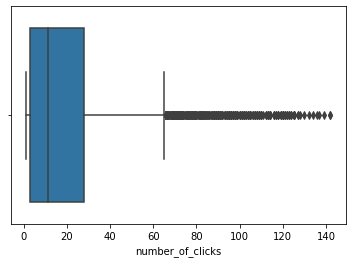

In [40]:
sns.boxplot(final_data['number_of_clicks'])

# noted that there are quite a few data points that are beyond the 99th percentile range 

In [41]:
# Although data under these above fields have quite a few outliers (shown from the box plots)
# It could be due to the fact that some are old customers who joined the company long time ago comparing to the new customers
# therefore, the rows with high numbers of engagement should be kept for further analysis and potentially model building 

#### Feature Engineering for Model Building

Model Building Objective: Using each customer's frequency of purchase, recency and number of campaigns responded to during the first 90 days to predict whether they would be high or low-value customers after a year. 

In [42]:
# first, decide whether or not these customers are high or low valued customers after joining for 365 days - as output to be predicted

# create new column - 365_join_date - the 365th date for each customer after joining the company 

final_data['365_join_date'] = final_data['join_date'] + pd.Timedelta(days=365)

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,6,3509.48,2024-11-19
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,9,6081.32,2022-09-08
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,6,1454.87,2022-06-01
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,10,5498.20,2023-12-16
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,3,3503.13,2024-09-16
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10


In [43]:
# calculate the LTV of each customer for their first 365 days 

# create a new dataframe that only has customer_id and their corresponding first 365th day 

df_365 = final_data.drop(['join_date', 'last_purchase_date', 'age', 'gender',
       'location', 'number_of_site_visits', 'number_of_emails_opened',
       'number_of_clicks', 'campaign_respond',
       'frequency_lifespan', 'LTV_lifespan'], axis = 1)

df_365


,customer_id,365_join_date
0,1,2024-11-19
1,2,2022-09-08
2,3,2022-06-01
3,4,2023-01-01
4,5,2023-01-24
...,...,...
9995,9996,2023-12-16
9996,9997,2023-07-09
9997,9998,2024-09-16
9998,9999,2023-05-10


In [44]:
# merge the df_365 with the transaction dataset 
# now I can calculate the frequency of purchases 
# and the total purchase amount occured within the 1 year timeframe

transaction_join = pd.merge(df4, df_365, on = ['customer_id','customer_id'], how = 'outer')

transaction_join

,transaction_id,customer_id,transaction_date,transaction_amount,product_category,365_join_date
0,1,1,2024-02-03,165.56,Clothing,2024-11-19
1,2,1,2024-03-02,699.01,Home Goods,2024-11-19
2,3,1,2024-03-12,146.86,Home Goods,2024-11-19
3,4,1,2024-01-20,927.46,Electronics,2024-11-19
4,5,1,2024-02-25,1395.87,Electronics,2024-11-19
...,...,...,...,...,...,...
129540,129541,10000,2023-05-27,371.70,Home Goods,2024-05-25
129541,129542,10000,2023-06-11,1245.23,Electronics,2024-05-25
129542,129543,10000,2023-06-28,745.74,Electronics,2024-05-25
129543,129544,10000,2023-07-21,587.37,Home Goods,2024-05-25


In [45]:
transaction_365 = transaction_join[transaction_join['transaction_date'] <= transaction_join['365_join_date']].groupby('customer_id')['transaction_amount'].sum()

transaction_365

customer_id
1         3509.48
2         4706.34
3          501.00
4         7874.68
5        14305.55
           ...   
9996      5498.20
9997      5848.30
9998      3503.13
9999      6721.86
10000     5775.83
Name: transaction_amount, Length: 9814, dtype: float64

In [46]:
transaction_365 = transaction_365.to_frame(name = 'LTV_365').reset_index()

transaction_365

,customer_id,LTV_365
0,1,3509.48
1,2,4706.34
2,3,501.00
3,4,7874.68
4,5,14305.55
...,...,...
9809,9996,5498.20
9810,9997,5848.30
9811,9998,3503.13
9812,9999,6721.86


In [47]:
final_data = pd.merge(final_data, transaction_365, on = ['customer_id','customer_id'], how = 'outer')

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,6,3509.48,2024-11-19,3509.48
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,9,6081.32,2022-09-08,4706.34
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,6,1454.87,2022-06-01,501.00
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01,7874.68
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24,14305.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,10,5498.20,2023-12-16,5498.20
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09,5848.30
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,3,3503.13,2024-09-16,3503.13
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10,6721.86


In [48]:
final_data[final_data['LTV_365'].isnull()]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365
23,24,2020-08-04,2023-03-10,48.0,Female,Lebury,460,154,71,3,2,2125.01,2021-08-04,NaN
69,70,2020-08-23,2023-12-13,68.0,Male,Rileyville,316,156,87,0,2,226.44,2021-08-23,NaN
159,160,2020-04-12,2023-03-10,39.0,Female,West John,87,85,24,1,1,1820.43,2021-04-12,NaN
196,197,2020-09-04,2022-07-24,30.0,Male,Jenningsfort,170,122,51,1,1,942.22,2021-09-04,NaN
219,220,2021-04-19,2023-11-17,63.0,Male,East Victoriaberg,275,58,75,3,2,1209.45,2022-04-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9540,9541,2020-03-27,2024-04-22,25.0,Female,Robertberg,331,6,104,1,11,4583.22,2021-03-27,NaN
9584,9585,2021-12-02,2024-05-18,29.0,Female,Oliviabury,264,109,83,2,1,76.05,2022-12-02,NaN
9691,9692,2021-07-09,2024-04-15,32.0,Male,Port Austin,37,146,67,1,5,4165.15,2022-07-09,NaN
9935,9936,2020-03-11,2023-09-13,36.0,Male,Freystad,113,79,18,2,12,7582.18,2021-03-11,NaN


In [49]:
df4[df4['customer_id'] == 24]

# join_date is very early -- 2020-08-04
# but made the first transaction in 2022 -- therefore, not making any purchases in the first 365 days - not an active user 


,transaction_id,customer_id,transaction_date,transaction_amount,product_category
286,287,24,2023-02-24,1959.01,Electronics
287,288,24,2022-01-27,166.00,Clothing


In [50]:
df4[df4['customer_id'] == 9982]

# join_date is very early -- 2020-03-22
# but made the first transaction in 2021-04-13 -- therefore, not making any purchases in the first 365 days
# although started to make purchases after, with the aim of observing their behaviours for the first 90 and 365 days -- not active 

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
129303,129304,9982,2023-07-16,134.92,Clothing
129304,129305,9982,2023-03-24,498.71,Clothing
129305,129306,9982,2023-11-27,1873.68,Electronics
129306,129307,9982,2022-10-17,57.08,Electronics
129307,129308,9982,2022-02-04,433.14,Clothing
129308,129309,9982,2023-10-25,261.78,Home Goods
129309,129310,9982,2021-04-13,385.07,Clothing


<AxesSubplot:xlabel='LTV_365', ylabel='Count'>

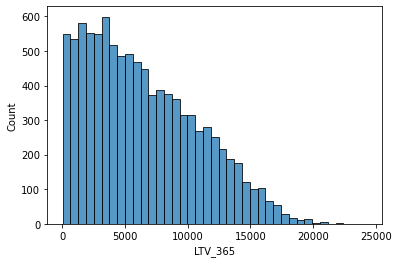

In [51]:
sns.histplot(final_data['LTV_365'])

In [52]:
final_data['LTV_365'].describe()
 

count     9814.000000
mean      6422.406318
std       4409.663104
min         10.450000
25%       2772.430000
50%       5695.095000
75%       9528.872500
max      24298.220000
Name: LTV_365, dtype: float64

In [53]:
# total_lifespan in years 

final_data['total_lifespan'] = (final_data['last_purchase_date'] - final_data['join_date']).dt.days

final_data['total_lifespan'] = final_data['total_lifespan']/365

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365,total_lifespan
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,6,3509.48,2024-11-19,3509.48,0.323288
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,9,6081.32,2022-09-08,4706.34,2.128767
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,6,1454.87,2022-06-01,501.00,1.490411
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01,7874.68,0.665753
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24,14305.55,1.353425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,10,5498.20,2023-12-16,5498.20,0.657534
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09,5848.30,0.547945
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,3,3503.13,2024-09-16,3503.13,0.369863
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10,6721.86,0.180822


In [54]:
# To get annual number_of_site_visits, number_of_emails_opened and number_of_clicks for each customer
# as categories to determine if the customer would be high valued or low valued 

final_data['number_of_site_visits_annual'] = final_data['number_of_site_visits'] / final_data['total_lifespan']

final_data['number_of_emails_opened_annual'] = final_data['number_of_emails_opened'] / final_data['total_lifespan']

final_data['number_of_clicks_annual'] = final_data['number_of_clicks'] / final_data['total_lifespan']

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,6,3509.48,2024-11-19,3509.48,0.323288,30.932203,46.398305,3.093220
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,9,6081.32,2022-09-08,4706.34,2.128767,133.880309,23.018018,23.957529
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,6,1454.87,2022-06-01,501.00,1.490411,128.823529,48.979779,16.773897
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01,7874.68,0.665753,165.226337,45.061728,25.534979
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24,14305.55,1.353425,118.957490,1.477733,5.172065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,10,5498.20,2023-12-16,5498.20,0.657534,180.979167,71.479167,24.333333
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09,5848.30,0.547945,5.475000,60.225000,25.550000
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,3,3503.13,2024-09-16,3503.13,0.369863,143.296296,45.962963,13.518519
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10,6721.86,0.180822,127.196970,27.651515,22.121212


In [55]:
final_data['number_of_emails_opened_annual'].mean()

# notice that the result of mean is infinity -- require investigation 

inf

In [56]:
final_data[final_data['number_of_site_visits_annual'] == np.inf]


# Notice here: number_of_site_visits_annual, number_of_emails_opened_annual and number_of_clicks_annual
# are infinity because the lifespan is 0 days

# Replace the inf values with 0 

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual
353,354,2024-05-29,2024-05-29,30.0,Female,Martintown,1,1,1,1,11,7567.83,2025-05-29,7567.83,0.0,inf,inf,inf
423,424,2021-06-02,2021-06-02,25.0,Female,Buchananborough,1,1,1,2,15,8869.24,2022-06-02,8869.24,0.0,inf,inf,inf
569,570,2024-03-23,2024-03-23,NaN,Male,West Madison,1,1,1,0,18,12306.07,2025-03-23,12306.07,0.0,inf,inf,inf
924,925,2023-09-14,2023-09-14,66.0,Male,West Kelsey,1,1,1,2,24,10201.53,2024-09-13,10201.53,0.0,inf,inf,inf
982,983,2024-05-31,2024-05-31,19.0,Female,Allenborough,1,1,1,1,8,5361.10,2025-05-31,5361.10,0.0,inf,inf,inf
995,996,2023-10-20,2023-10-20,NaN,Male,North Tanya,1,1,1,1,22,14562.38,2024-10-19,14562.38,0.0,inf,inf,inf
1067,1068,2024-05-27,2024-05-27,57.0,Unknown,Eatonfort,1,1,1,1,18,10414.75,2025-05-27,10414.75,0.0,inf,inf,inf
1260,1261,2024-05-24,2024-05-24,NaN,Male,East Vincent,1,1,1,3,16,6041.33,2025-05-24,6041.33,0.0,inf,inf,inf
1447,1448,2020-01-26,2020-01-26,59.0,Male,Lake Larry,1,1,1,0,24,14414.28,2021-01-25,14414.28,0.0,inf,inf,inf
1515,1516,2024-05-26,2024-05-26,36.0,Female,Forbesport,1,1,1,1,15,10219.28,2025-05-26,10219.28,0.0,inf,inf,inf


In [57]:
print(final_data[final_data['number_of_emails_opened_annual'] == np.inf].shape)
print(final_data[final_data['number_of_site_visits_annual'] == np.inf].shape)
print(final_data[final_data['number_of_clicks_annual'] == np.inf].shape)

# the same rows are having the same problem as inf values 


(48, 18)
(48, 18)
(48, 18)


In [58]:
# Replacing these values with NULL values first, and then replace them to 0 

final_data['number_of_site_visits_annual'].replace([np.inf, -np.inf], np.nan, inplace=True)
final_data['number_of_emails_opened_annual'].replace([np.inf, -np.inf], np.nan, inplace=True)
final_data['number_of_clicks_annual'].replace([np.inf, -np.inf], np.nan, inplace=True)

final_data['number_of_site_visits_annual'].fillna(0, inplace=True)
final_data['number_of_emails_opened_annual'].fillna(0, inplace=True)
final_data['number_of_clicks_annual'].fillna(0, inplace=True)

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,6,3509.48,2024-11-19,3509.48,0.323288,30.932203,46.398305,3.093220
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,9,6081.32,2022-09-08,4706.34,2.128767,133.880309,23.018018,23.957529
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,6,1454.87,2022-06-01,501.00,1.490411,128.823529,48.979779,16.773897
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01,7874.68,0.665753,165.226337,45.061728,25.534979
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24,14305.55,1.353425,118.957490,1.477733,5.172065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,10,5498.20,2023-12-16,5498.20,0.657534,180.979167,71.479167,24.333333
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09,5848.30,0.547945,5.475000,60.225000,25.550000
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,3,3503.13,2024-09-16,3503.13,0.369863,143.296296,45.962963,13.518519
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10,6721.86,0.180822,127.196970,27.651515,22.121212


In [59]:
print(final_data['number_of_site_visits_annual'].describe())

print(final_data['number_of_emails_opened_annual'].describe())

print(final_data['number_of_clicks_annual'].describe())

# now, there is no more infinity values in the dataset 

count    10000.000000
mean        91.486429
std         54.304665
min          0.000000
25%         45.539627
50%         91.250000
75%        135.953006
max        365.000000
Name: number_of_site_visits_annual, dtype: float64
count    10000.000000
mean        38.372357
std         29.988175
min          0.000000
25%         19.596671
50%         36.500000
75%         53.524200
max        365.000000
Name: number_of_emails_opened_annual, dtype: float64
count    10000.000000
mean        21.028406
std         26.569771
min          0.000000
25%          9.908382
50%         18.379607
75%         26.707317
max        365.000000
Name: number_of_clicks_annual, dtype: float64


In [60]:
final_data['LTV_365'].median()

5695.094999999999

In [61]:
final_data['LTV_365'].quantile(0.40)

4432.624000000001

In [62]:
final_data['number_of_site_visits_annual'].median()

91.25

In [63]:
final_data['number_of_emails_opened_annual'].median()

36.5

In [64]:
final_data['number_of_clicks_annual'].median()

18.379607401850464

In [65]:
final_data[final_data['LTV_365'] > 5695.09499999999]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01,7874.68,0.665753,165.226337,45.061728,25.534979
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24,14305.55,1.353425,118.957490,1.477733,5.172065
5,6,2022-01-01,2023-02-10,55.0,Female,North Richardfort,74,59,7,1,17,10254.44,2023-01-01,10254.44,1.109589,66.691358,53.172840,6.308642
7,8,2023-02-09,2023-08-09,68.0,Male,Marquezton,60,22,7,2,15,11710.62,2024-02-09,11710.62,0.495890,120.994475,44.364641,14.116022
8,9,2022-01-24,2023-08-15,68.0,Female,West Franciscobury,49,43,21,1,22,10382.96,2023-01-24,8062.57,1.556164,31.487676,27.632042,13.494718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9992,2024-01-12,2024-02-03,19.0,Female,Mitchellshire,9,1,1,1,18,12543.37,2025-01-11,12543.37,0.060274,149.318182,16.590909,16.590909
9992,9993,2020-04-10,2021-11-11,47.0,Unknown,Taylormouth,269,83,25,2,24,15548.36,2021-04-10,11127.79,1.589041,169.284483,52.232759,15.732759
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09,5848.30,0.547945,5.475000,60.225000,25.550000
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10,6721.86,0.180822,127.196970,27.651515,22.121212


In [66]:
# determine high value or low value customers 
# proxy -- LTV_365 over the median OR LTV_365 value over 30th percentile and at least one engagement metrics greater than the median -- High value customers
# else, would be low-value customer  

def value(row): 
    
    if row['LTV_365'] > 5695.094999999999: 
        return 1
    
    elif row['LTV_365'] > 4432.624000000001 and (row['number_of_site_visits_annual'] > 91.25
                                     or row['number_of_emails_opened_annual'] > 36.5
                                     or row['number_of_clicks_annual'] > 18.379607401850464):
        return 1

    else: 
        return 0 

In [67]:
final_data['365_value'] = final_data.apply(value, axis = 1)

final_data

# the dataset now has 365_value - column that distinguishes customers into high and low value

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,6,3509.48,2024-11-19,3509.48,0.323288,30.932203,46.398305,3.093220,0
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,9,6081.32,2022-09-08,4706.34,2.128767,133.880309,23.018018,23.957529,1
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,6,1454.87,2022-06-01,501.00,1.490411,128.823529,48.979779,16.773897,0
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01,7874.68,0.665753,165.226337,45.061728,25.534979,1
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24,14305.55,1.353425,118.957490,1.477733,5.172065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,10,5498.20,2023-12-16,5498.20,0.657534,180.979167,71.479167,24.333333,1
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09,5848.30,0.547945,5.475000,60.225000,25.550000,1
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,3,3503.13,2024-09-16,3503.13,0.369863,143.296296,45.962963,13.518519,0
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10,6721.86,0.180822,127.196970,27.651515,22.121212,1


In [68]:
final_data.groupby('365_value')['customer_id'].count()

# gives a relatively balanced dataset -- 0: low value; 1: high value

365_value
0    4229
1    5771
Name: customer_id, dtype: int64

In [69]:
# Now, we need to look at variables -- Recency, Frequency, numbers of campaigns responeded during the first 90 days of joining the company 

final_data['90_join'] = final_data['join_date'] + pd.Timedelta(days=90)

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,frequency_lifespan,LTV_lifespan,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value,90_join
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,6,3509.48,2024-11-19,3509.48,0.323288,30.932203,46.398305,3.093220,0,2024-02-18
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,9,6081.32,2022-09-08,4706.34,2.128767,133.880309,23.018018,23.957529,1,2021-12-07
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,6,1454.87,2022-06-01,501.00,1.490411,128.823529,48.979779,16.773897,0,2021-08-30
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,20,7874.68,2023-01-01,7874.68,0.665753,165.226337,45.061728,25.534979,1,2022-04-01
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,24,15524.55,2023-01-24,14305.55,1.353425,118.957490,1.477733,5.172065,1,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,10,5498.20,2023-12-16,5498.20,0.657534,180.979167,71.479167,24.333333,1,2023-03-16
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,12,5848.30,2023-07-09,5848.30,0.547945,5.475000,60.225000,25.550000,1,2022-10-07
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,3,3503.13,2024-09-16,3503.13,0.369863,143.296296,45.962963,13.518519,0,2023-12-16
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,12,6721.86,2023-05-10,6721.86,0.180822,127.196970,27.651515,22.121212,1,2022-08-08


In [70]:
final_data.columns

Index(['customer_id', 'join_date', 'last_purchase_date', 'age', 'gender',
       'location', 'number_of_site_visits', 'number_of_emails_opened',
       'number_of_clicks', 'campaign_respond', 'frequency_lifespan',
       'LTV_lifespan', '365_join_date', 'LTV_365', 'total_lifespan',
       'number_of_site_visits_annual', 'number_of_emails_opened_annual',
       'number_of_clicks_annual', '365_value', '90_join'],
      dtype='object')

In [71]:
# create new dataframe that only has customer_id and their corresponding first 90th day
 
df_90 = final_data.drop(['join_date', 'last_purchase_date', 'age', 'gender',
       'location', 'number_of_site_visits', 'number_of_emails_opened',
       'number_of_clicks', 'campaign_respond', 'frequency_lifespan',
       'LTV_lifespan', '365_join_date', 'LTV_365', 'total_lifespan',
       'number_of_site_visits_annual', 'number_of_emails_opened_annual',
       'number_of_clicks_annual', '365_value'], axis = 1)

df_90

,customer_id,90_join
0,1,2024-02-18
1,2,2021-12-07
2,3,2021-08-30
3,4,2022-04-01
4,5,2022-04-24
...,...,...
9995,9996,2023-03-16
9996,9997,2022-10-07
9997,9998,2023-12-16
9998,9999,2022-08-08


In [72]:
# merge df_90 to the transaction dataset 

transaction_join = pd.merge(df4, df_90, on = ['customer_id','customer_id'], how = 'outer')

transaction_join

,transaction_id,customer_id,transaction_date,transaction_amount,product_category,90_join
0,1,1,2024-02-03,165.56,Clothing,2024-02-18
1,2,1,2024-03-02,699.01,Home Goods,2024-02-18
2,3,1,2024-03-12,146.86,Home Goods,2024-02-18
3,4,1,2024-01-20,927.46,Electronics,2024-02-18
4,5,1,2024-02-25,1395.87,Electronics,2024-02-18
...,...,...,...,...,...,...
129540,129541,10000,2023-05-27,371.70,Home Goods,2023-08-24
129541,129542,10000,2023-06-11,1245.23,Electronics,2023-08-24
129542,129543,10000,2023-06-28,745.74,Electronics,2023-08-24
129543,129544,10000,2023-07-21,587.37,Home Goods,2023-08-24


In [73]:
# get frequency for each customer

frequency_90 = transaction_join[transaction_join['transaction_date'] <= transaction_join['90_join']].groupby('customer_id')['transaction_date'].count()

frequency_90


customer_id
1         3
2         1
4         4
5         3
6         2
         ..
9996      7
9997      7
9998      2
9999     12
10000     9
Name: transaction_date, Length: 8673, dtype: int64

In [74]:
frequency_90 = frequency_90.to_frame(name = 'frequency_90').reset_index()

frequency_90

# frequency_90 -- the count of transactions over the first 90 days timespan for each customer

,customer_id,frequency_90
0,1,3
1,2,1
2,4,4
3,5,3
4,6,2
...,...,...
8668,9996,7
8669,9997,7
8670,9998,2
8671,9999,12


In [75]:
final_data = pd.merge(final_data, frequency_90, on = ['customer_id','customer_id'], how = 'outer')

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,...,LTV_lifespan,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value,90_join,frequency_90
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,...,3509.48,2024-11-19,3509.48,0.323288,30.932203,46.398305,3.093220,0,2024-02-18,3.0
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,...,6081.32,2022-09-08,4706.34,2.128767,133.880309,23.018018,23.957529,1,2021-12-07,1.0
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,...,1454.87,2022-06-01,501.00,1.490411,128.823529,48.979779,16.773897,0,2021-08-30,NaN
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,...,7874.68,2023-01-01,7874.68,0.665753,165.226337,45.061728,25.534979,1,2022-04-01,4.0
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,...,15524.55,2023-01-24,14305.55,1.353425,118.957490,1.477733,5.172065,1,2022-04-24,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,...,5498.20,2023-12-16,5498.20,0.657534,180.979167,71.479167,24.333333,1,2023-03-16,7.0
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,...,5848.30,2023-07-09,5848.30,0.547945,5.475000,60.225000,25.550000,1,2022-10-07,7.0
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,...,3503.13,2024-09-16,3503.13,0.369863,143.296296,45.962963,13.518519,0,2023-12-16,2.0
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,...,6721.86,2023-05-10,6721.86,0.180822,127.196970,27.651515,22.121212,1,2022-08-08,12.0


In [76]:
# get recency for each customer

recency_date = transaction_join[transaction_join['transaction_date'] <= transaction_join['90_join']].groupby('customer_id')['transaction_date'].max()

recency_date

customer_id
1       2024-02-03
2       2021-09-29
4       2022-02-27
5       2022-04-24
6       2022-02-12
           ...    
9996    2023-03-08
9997    2022-09-30
9998    2023-11-27
9999    2022-07-14
10000   2023-08-03
Name: transaction_date, Length: 8673, dtype: datetime64[ns]

In [77]:
recency_date = recency_date.to_frame(name = 'recent_date_90').reset_index()

recency_date  
# this gives the last transaction date within the first 90 day timespan for each customer

,customer_id,recent_date_90
0,1,2024-02-03
1,2,2021-09-29
2,4,2022-02-27
3,5,2022-04-24
4,6,2022-02-12
...,...,...
8668,9996,2023-03-08
8669,9997,2022-09-30
8670,9998,2023-11-27
8671,9999,2022-07-14


In [78]:
final_data = pd.merge(final_data, recency_date, on = ['customer_id','customer_id'], how = 'outer')

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,...,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value,90_join,frequency_90,recent_date_90
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,...,2024-11-19,3509.48,0.323288,30.932203,46.398305,3.093220,0,2024-02-18,3.0,2024-02-03
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,...,2022-09-08,4706.34,2.128767,133.880309,23.018018,23.957529,1,2021-12-07,1.0,2021-09-29
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,...,2022-06-01,501.00,1.490411,128.823529,48.979779,16.773897,0,2021-08-30,NaN,NaT
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,...,2023-01-01,7874.68,0.665753,165.226337,45.061728,25.534979,1,2022-04-01,4.0,2022-02-27
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,...,2023-01-24,14305.55,1.353425,118.957490,1.477733,5.172065,1,2022-04-24,3.0,2022-04-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,...,2023-12-16,5498.20,0.657534,180.979167,71.479167,24.333333,1,2023-03-16,7.0,2023-03-08
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,...,2023-07-09,5848.30,0.547945,5.475000,60.225000,25.550000,1,2022-10-07,7.0,2022-09-30
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,...,2024-09-16,3503.13,0.369863,143.296296,45.962963,13.518519,0,2023-12-16,2.0,2023-11-27
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,...,2023-05-10,6721.86,0.180822,127.196970,27.651515,22.121212,1,2022-08-08,12.0,2022-07-14


In [79]:
# Notice there are some nulls under recent_date_90

final_data[final_data['recent_date_90'].isnull()]

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,...,365_join_date,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value,90_join,frequency_90,recent_date_90
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,...,2022-06-01,501.00,1.490411,128.823529,48.979779,16.773897,0,2021-08-30,NaN,NaT
18,19,2021-03-11,2023-06-05,NaN,Female,New Nicholasville,166,134,3,1,...,2022-03-11,2088.67,2.235616,74.252451,59.938725,1.341912,0,2021-06-09,NaN,NaT
23,24,2020-08-04,2023-03-10,48.0,Female,Lebury,460,154,71,3,...,2021-08-04,NaN,2.597260,177.109705,59.293249,27.336498,0,2020-11-02,NaN,NaT
33,34,2021-08-08,2023-04-29,44.0,Female,Port Christopher,132,21,4,1,...,2022-08-08,483.07,1.723288,76.597774,12.186010,2.321145,0,2021-11-06,NaN,NaT
44,45,2020-02-11,2023-12-03,23.0,Male,Lake Patriciaberg,244,94,119,0,...,2021-02-10,2772.28,3.810959,64.025881,24.665708,31.225737,0,2020-05-11,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,9956,2021-03-26,2024-05-01,49.0,Female,Rachaelshire,46,216,73,2,...,2022-03-26,1689.63,3.101370,14.832155,69.646643,23.537986,0,2021-06-24,NaN,NaT
9974,9975,2020-08-23,2022-09-18,39.0,Female,Mcclurefurt,31,110,55,1,...,2021-08-23,2018.56,2.071233,14.966931,53.108466,26.554233,0,2020-11-21,NaN,NaT
9981,9982,2020-03-22,2024-05-20,45.0,Female,Watkinsshire,345,8,77,0,...,2021-03-22,NaN,4.164384,82.845395,1.921053,18.490132,0,2020-06-20,NaN,NaT
9984,9985,2022-12-31,2024-03-11,40.0,Female,Port Johnny,89,71,11,0,...,2023-12-31,2580.73,1.194521,74.506881,59.438073,9.208716,0,2023-03-31,NaN,NaT


In [82]:
df4[df4['customer_id'] == 3]

# Here, customer_id 3 -- joining date is 2021-06-01	but made the first purchase after 119 days
# exceeding the 90th day limit, meaning this user is not active during the first 90th day
# they would have no recency measures by replacing NULLs with 0 later 

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
15,16,3,2022-07-01,68.35,Home Goods
16,17,3,2022-11-11,275.57,Electronics
17,18,3,2022-11-18,265.48,Clothing
18,19,3,2021-09-28,347.76,Clothing
19,20,3,2022-07-22,344.47,Electronics
20,21,3,2021-11-04,153.24,Electronics


In [83]:
from datetime import datetime

date1 = datetime.strptime('2021-09-28', '%Y-%m-%d')
date2 = datetime.strptime('2021-06-01', '%Y-%m-%d')

# Calculate the difference in days
days_difference = (date1 - date2).days

days_difference

119

In [84]:
# recency_90 -- the difference in days between the last transaction date within the first 90 days timeframe and the 90th date

final_data['recency_90'] = final_data['recent_date_90'] - final_data['join_date']

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,...,LTV_365,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value,90_join,frequency_90,recent_date_90,recency_90
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,...,3509.48,0.323288,30.932203,46.398305,3.093220,0,2024-02-18,3.0,2024-02-03,75 days
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,...,4706.34,2.128767,133.880309,23.018018,23.957529,1,2021-12-07,1.0,2021-09-29,21 days
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,...,501.00,1.490411,128.823529,48.979779,16.773897,0,2021-08-30,NaN,NaT,NaT
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,...,7874.68,0.665753,165.226337,45.061728,25.534979,1,2022-04-01,4.0,2022-02-27,57 days
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,...,14305.55,1.353425,118.957490,1.477733,5.172065,1,2022-04-24,3.0,2022-04-24,90 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,...,5498.20,0.657534,180.979167,71.479167,24.333333,1,2023-03-16,7.0,2023-03-08,82 days
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,...,5848.30,0.547945,5.475000,60.225000,25.550000,1,2022-10-07,7.0,2022-09-30,83 days
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,...,3503.13,0.369863,143.296296,45.962963,13.518519,0,2023-12-16,2.0,2023-11-27,71 days
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,...,6721.86,0.180822,127.196970,27.651515,22.121212,1,2022-08-08,12.0,2022-07-14,65 days


In [85]:
# now, look at the campaign_respond during the first 90 days 

df3

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08
...,...,...,...,...,...
25195,25196,9998,Yes,Discount,2023-09-20
25196,25197,9999,No,Buy One Get One,2022-06-02
25197,25198,9999,No,Discount,2022-05-14
25198,25199,10000,No,Free Shipping,2023-06-12


In [86]:
df_90

# merge this to the df3 so that the first 90th dates could be compared with the campaign dates 

,customer_id,90_join
0,1,2024-02-18
1,2,2021-12-07
2,3,2021-08-30
3,4,2022-04-01
4,5,2022-04-24
...,...,...
9995,9996,2023-03-16
9996,9997,2022-10-07
9997,9998,2023-12-16
9998,9999,2022-08-08


In [87]:
campaign_data = pd.merge(df3, df_90, on = ['customer_id','customer_id'], how = 'outer')

campaign_data

,campaign_id,customer_id,response,promotion_type,campaign_date,90_join
0,1,1,No,Buy One Get One,2024-02-29,2024-02-18
1,2,1,No,Discount,2024-01-24,2024-02-18
2,3,1,No,Free Shipping,2024-03-05,2024-02-18
3,4,1,Yes,Buy One Get One,2024-01-10,2024-02-18
4,5,2,Yes,Free Shipping,2022-07-08,2021-12-07
...,...,...,...,...,...,...
25195,25196,9998,Yes,Discount,2023-09-20,2023-12-16
25196,25197,9999,No,Buy One Get One,2022-06-02,2022-08-08
25197,25198,9999,No,Discount,2022-05-14,2022-08-08
25198,25199,10000,No,Free Shipping,2023-06-12,2023-08-24


In [88]:

campaign_90 = campaign_data[campaign_data['campaign_date'] <= campaign_data['90_join']].groupby('customer_id')['campaign_date'].count()

campaign_90

customer_id
1        2
2        1
4        1
5        1
11       3
        ..
9992     3
9994     3
9998     1
9999     2
10000    2
Name: campaign_date, Length: 6042, dtype: int64

In [89]:
campaign_90 = campaign_90.to_frame(name = 'campaign_respond_90').reset_index()

campaign_90 
# get numbers of campaigns responded within the first 90 day timespan foe each customer

,customer_id,campaign_respond_90
0,1,2
1,2,1
2,4,1
3,5,1
4,11,3
...,...,...
6037,9992,3
6038,9994,3
6039,9998,1
6040,9999,2


In [90]:
final_data = pd.merge(final_data, campaign_90, on = ['customer_id','customer_id'], how = 'outer')

final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,...,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value,90_join,frequency_90,recent_date_90,recency_90,campaign_respond_90
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,...,0.323288,30.932203,46.398305,3.093220,0,2024-02-18,3.0,2024-02-03,75 days,2.0
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,...,2.128767,133.880309,23.018018,23.957529,1,2021-12-07,1.0,2021-09-29,21 days,1.0
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,...,1.490411,128.823529,48.979779,16.773897,0,2021-08-30,NaN,NaT,NaT,NaN
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,...,0.665753,165.226337,45.061728,25.534979,1,2022-04-01,4.0,2022-02-27,57 days,1.0
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,...,1.353425,118.957490,1.477733,5.172065,1,2022-04-24,3.0,2022-04-24,90 days,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,...,0.657534,180.979167,71.479167,24.333333,1,2023-03-16,7.0,2023-03-08,82 days,NaN
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,...,0.547945,5.475000,60.225000,25.550000,1,2022-10-07,7.0,2022-09-30,83 days,NaN
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,...,0.369863,143.296296,45.962963,13.518519,0,2023-12-16,2.0,2023-11-27,71 days,1.0
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,...,0.180822,127.196970,27.651515,22.121212,1,2022-08-08,12.0,2022-07-14,65 days,2.0


In [91]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   customer_id                     10000 non-null  int64          
 1   join_date                       10000 non-null  datetime64[ns] 
 2   last_purchase_date              10000 non-null  datetime64[ns] 
 3   age                             8991 non-null   float64        
 4   gender                          10000 non-null  object         
 5   location                        10000 non-null  object         
 6   number_of_site_visits           10000 non-null  int64          
 7   number_of_emails_opened         10000 non-null  int64          
 8   number_of_clicks                10000 non-null  int64          
 9   campaign_respond                10000 non-null  int32          
 10  frequency_lifespan              10000 non-null  int64      

In [92]:
# replace the null values into 0

final_data['recency_90'] = final_data['recency_90'].dt.days


In [93]:
columns_to_fill = ['frequency_90', 'recency_90', 'campaign_respond_90']

final_data[columns_to_fill] = final_data[columns_to_fill].fillna(0)

In [94]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   customer_id                     10000 non-null  int64         
 1   join_date                       10000 non-null  datetime64[ns]
 2   last_purchase_date              10000 non-null  datetime64[ns]
 3   age                             8991 non-null   float64       
 4   gender                          10000 non-null  object        
 5   location                        10000 non-null  object        
 6   number_of_site_visits           10000 non-null  int64         
 7   number_of_emails_opened         10000 non-null  int64         
 8   number_of_clicks                10000 non-null  int64         
 9   campaign_respond                10000 non-null  int32         
 10  frequency_lifespan              10000 non-null  int64         
 11  LTV

In [95]:
final_data

,customer_id,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,campaign_respond,...,total_lifespan,number_of_site_visits_annual,number_of_emails_opened_annual,number_of_clicks_annual,365_value,90_join,frequency_90,recent_date_90,recency_90,campaign_respond_90
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,1,...,0.323288,30.932203,46.398305,3.093220,0,2024-02-18,3.0,2024-02-03,75.0,2.0
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville,285,49,51,2,...,2.128767,133.880309,23.018018,23.957529,1,2021-12-07,1.0,2021-09-29,21.0,1.0
2,3,2021-06-01,2022-11-27,NaN,Unknown,North Latoyatown,192,73,25,1,...,1.490411,128.823529,48.979779,16.773897,0,2021-08-30,0.0,NaT,0.0,0.0
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,1,...,0.665753,165.226337,45.061728,25.534979,1,2022-04-01,4.0,2022-02-27,57.0,1.0
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort,161,2,7,0,...,1.353425,118.957490,1.477733,5.172065,1,2022-04-24,3.0,2022-04-24,90.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,0,...,0.657534,180.979167,71.479167,24.333333,1,2023-03-16,7.0,2023-03-08,82.0,0.0
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,1,...,0.547945,5.475000,60.225000,25.550000,1,2022-10-07,7.0,2022-09-30,83.0,0.0
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,1,...,0.369863,143.296296,45.962963,13.518519,0,2023-12-16,2.0,2023-11-27,71.0,1.0
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,23,5,4,0,...,0.180822,127.196970,27.651515,22.121212,1,2022-08-08,12.0,2022-07-14,65.0,2.0


In [96]:
final_data.groupby('365_value')['customer_id'].count()

# dataset here - relatively balanced between high value (populated as 1) and low value customers (populated as 0)

365_value
0    4229
1    5771
Name: customer_id, dtype: int64

#### Model Building

In [97]:
# identify the x and y -- predictors and outputs would be used for modelling 

X = final_data[['frequency_90',
       'recency_90', 'campaign_respond_90']]


y = final_data['365_value']

In [98]:
# reserve 30% for testing 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [99]:
# scaling the preditors for the model to interpret easier 

MinMaxScaler().fit_transform(final_data[['frequency_90',
       'recency_90', 'campaign_respond_90']])

array([[0.12      , 0.83333333, 0.5       ],
       [0.04      , 0.23333333, 0.25      ],
       [0.        , 0.        , 0.        ],
       ...,
       [0.08      , 0.78888889, 0.25      ],
       [0.48      , 0.72222222, 0.5       ],
       [0.36      , 0.76666667, 0.5       ]])

In [100]:
# build pipeline that includes these transformations
numeric_columns = ['frequency_90',
       'recency_90', 'campaign_respond_90']


In [101]:
# create a pre-processing pipeline which includes the steps of scaling numeric variables 
preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
  
    ]
)

In [102]:
# test 3 models with cross validation to see which ones work best for this dataset
knn = KNeighborsClassifier()
logreg = LogisticRegression()
nb = GaussianNB()

In [103]:
# cross validation to determine in general which model works best for the given problem - by looking at the f1 score

knn_scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='f1', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='f1', cv=5)

In [104]:
# f1 scores:

print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))

# Logistics regression gives the highest f1 average score, following by KNN

0.8198065258491077
0.8334640193159941
0.7686342677315335


In [105]:
# cross validation to determine in general which model works best for the given problem - by looking at the accuracy score

knn_scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='accuracy', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=5)

In [106]:
# accuracy score:

print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))

# Logistics regression gives the highest accuracy score on average, following by KNN

0.7967142857142857
0.8117142857142857
0.7628571428571428


In [107]:
# cross validation to determine in general which model works best for the given problem - by looking at the Precision score 

knn_scores = cross_val_score(knn, X_train, y_train, scoring='precision', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='precision', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='precision', cv=5)

In [108]:
# precision score:

print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))

# Naive Bayes gives the highest Precision score on average, follwing by Logistics regression

0.8326226210806963
0.8444716246808348
0.8713798577158285


In [109]:
# cross validation to determine in general which model works best for the given problem - by looking at the Recall score 

knn_scores = cross_val_score(knn, X_train, y_train, scoring='recall', cv=5)
logreg_scores = cross_val_score(logreg, X_train, y_train, scoring='recall', cv=5)
nb_scores = cross_val_score(nb, X_train, y_train, scoring='recall', cv=5)

In [110]:
# recall score:

print(np.mean(knn_scores))
print(np.mean(logreg_scores))
print(np.mean(nb_scores))

# Logistics gives the highest Recall score on average, following by the KNN

0.8077828467436639
0.822985189578979
0.6878606721055395


#### Model Selection & Performance

Choose KNN as the final model because it has consistent high F1, accuracy, and recall scores, although lower than the scores of Logistics regression model, the model could be improved with hyperparameter tuning approach  (default of K neighbor is 5 but this could be updated)


In [112]:
# continue building the pipeline - with KNN classifer only 

pipeline = Pipeline(steps=
                    [
                        ('preprocessor',preprocessor),
                        ('classifier',KNeighborsClassifier())
                    ])

In [119]:
# find the best combination of hyperparameters for this KNN model (default neighbor was 5 for the baseline model)
param_grid = {
    'classifier__n_neighbors':[5,9,15,17,21,25,29,33,37,41,45],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','manhattan','minkowski']
}

In [120]:
# perform gridsearch, prioritize recall score as it is the score I want to focus for this business scenario   

grid_search = GridSearchCV(pipeline, param_grid, cv = 5, scoring = 'recall')   # five times, five random split of data, choose the one with the best recall scores

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         MinMaxScaler(),
                                                                         ['frequency_90',
                                                                          'recency_90',
                                                                          'campaign_respond_90'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [5, 9, 15, 17, 21, 25, 29,
                                                     33, 37, 41, 45],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='recall')

In [121]:
print(grid_search.best_params_)

# The best model is finalized to be the KNN model with manhattan metric, with 21 neighbors and uniform weights

{'classifier__metric': 'manhattan', 'classifier__n_neighbors': 21, 'classifier__weights': 'uniform'}


In [129]:
# double check if KNN with 21 neighbors would give appropirate and reasonable scores, specifically the 
# recall score 

knn_21 = KNeighborsClassifier(n_neighbors=21).fit(X_train,y_train)
pred_21 = knn_21.predict(X_test)
print(accuracy_score(y_test, pred_21))
print(f1_score(y_test, pred_21))
print(precision_score(y_test, pred_21))
print(recall_score(y_test, pred_21))

0.8083333333333333
0.8317237342698273
0.8575739287869644
0.8073863636363636


In [130]:
# final model with the best parameters - use best parameters for the pipeline

final_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
                                        metric = grid_search.best_params_['classifier__metric'],
                                        weights = grid_search.best_params_['classifier__weights']
                                        )

In [131]:
final_pipeline = Pipeline(steps=
                          [
                              ('preprocessor',preprocessor),
                              ('classifier',final_classifier)
                          ])

In [132]:
# fit training data into the pipeline

final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['frequency_90', 'recency_90',
                                                   'campaign_respond_90'])])),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=21))])

In [133]:
# prediction generated based on the test data 

pred = final_pipeline.predict(X_test)

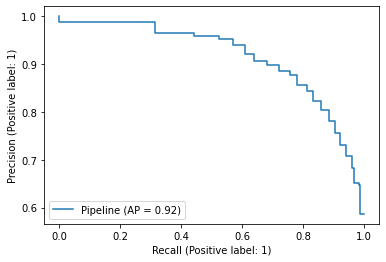

In [134]:
# Precision and Recall curve 

display = PrecisionRecallDisplay.from_estimator(final_pipeline ,X_test, y_test)

In [135]:
# generate confusion matrix - check if the model is performing well -- comparing prediction and test data

conf_matrix_knn = confusion_matrix(y_test, pred)

Text(0.5, 15.0, 'Predicted Classes')

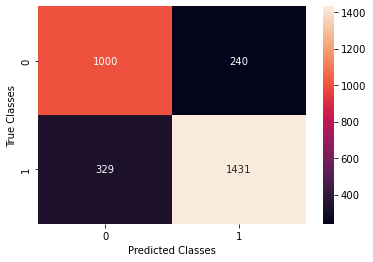

In [136]:
sns.heatmap(conf_matrix_knn, fmt='g', annot = True)
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')

In [137]:
# f1 score of KNN model using the best parameters:  

f1_score(y_test, pred)

0.8341591372777616

In [138]:
# accuracy score of KNN model using the best parameters:  

accuracy_score(y_test,pred)

0.8103333333333333

In [139]:
# precision score of KNN model using the best parameters:  

precision_score(y_test,pred)

0.8563734290843806

In [140]:
# recall score of of KNN model using the best parameters:  

recall_score(y_test,pred)

0.8130681818181819